In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df.tail()

,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [7]:
len(df)

3000888

In [8]:
df=df.dropna()

In [9]:
len(df)

3000888

In [10]:
df['date']=pd.to_datetime(df['date'])

In [11]:
df=df[["date","sales"]]

In [12]:
df.head()

,date,sales
0,2013-01-01,0.0
1,2013-01-01,0.0
2,2013-01-01,0.0
3,2013-01-01,0.0
4,2013-01-01,0.0


In [13]:
df.describe()

,sales
count,3.000888e+06
mean,3.577757e+02
std,1.101998e+03
min,0.000000e+00
25%,0.000000e+00
50%,1.100000e+01
75%,1.958473e+02
max,1.247170e+05


In [16]:
df.set_index('date',inplace=True)

In [17]:
df.head()

,sales
date,
2013-01-01,0.0
2013-01-01,0.0
2013-01-01,0.0
2013-01-01,0.0
2013-01-01,0.0


In [18]:
df.describe()

,sales
count,3.000888e+06
mean,3.577757e+02
std,1.101998e+03
min,0.000000e+00
25%,0.000000e+00
50%,1.100000e+01
75%,1.958473e+02
max,1.247170e+05


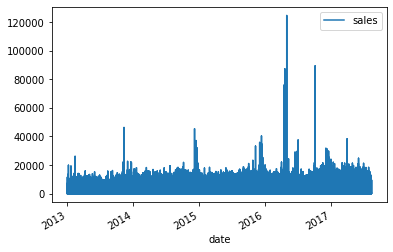

In [19]:
df.plot()

In [23]:
df.reset_index()

,date,sales
0,2013-01-01,0.0
1,2013-01-01,0.0
2,2013-01-01,0.0
3,2013-01-01,0.0
4,2013-01-01,0.0
...,...,...
532641,2013-10-26,0.0
532642,2013-10-26,0.0
532643,2013-10-26,0.0
532644,2013-10-26,0.0


In [28]:
df.columns

Index(['sales'], dtype='object')

In [26]:
df = df.rename(columns={'index': 'date'})

In [14]:
dfms = df.groupby(pd.Grouper(key='date', freq='M'))['sales'].mean()

In [15]:
dfms.head()

date
2013-01-31    186.952405
2013-02-28    193.581846
2013-03-31    206.880581
2013-04-30    205.639071
2013-05-31    209.943594
Freq: M, Name: sales, dtype: float64

In [20]:
dfms=dfms.to_frame()

In [21]:
dfms.head()

,sales
date,
2013-01-31,186.952405
2013-02-28,193.581846
2013-03-31,206.880581
2013-04-30,205.639071
2013-05-31,209.943594


In [23]:
print(len(dfms))

56


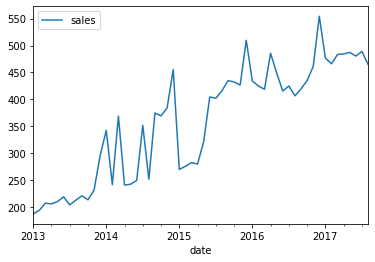

In [24]:
dfms.plot()

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [27]:
adfuller_test(dfms['sales'])

ADF Test Statistic : -1.574663931940097
p-value : 0.4963069089455667
#Lags Used : 1
Number of Observations Used : 54
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [28]:
dfms['price firstdiff'] = dfms['sales'] - dfms["sales"].shift(1)

In [29]:
dfms['Seasonal First Difference']=dfms['sales']-dfms['sales'].shift(12)

In [30]:
dfms['sales'].shift(1)

date
2013-01-31           NaN
2013-02-28    186.952405
2013-03-31    193.581846
2013-04-30    206.880581
2013-05-31    205.639071
2013-06-30    209.943594
2013-07-31    218.655893
2013-08-31    203.783364
2013-09-30    212.479434
2013-10-31    220.593588
2013-11-30    213.164266
2013-12-31    231.136537
2014-01-31    295.606381
2014-02-28    342.341709
2014-03-31    241.268892
2014-04-30    368.661236
2014-05-31    240.577087
2014-06-30    242.203129
2014-07-31    249.157467
2014-08-31    351.578347
2014-09-30    251.351805
2014-10-31    374.530792
2014-11-30    369.213666
2014-12-31    384.056027
2015-01-31    455.302177
2015-02-28    269.666595
2015-03-31    275.420792
2015-04-30    282.368624
2015-05-31    279.743138
2015-06-30    320.958116
2015-07-31    404.327728
2015-08-31    402.042269
2015-09-30    415.692304
2015-10-31    434.734053
2015-11-30    432.248428
2015-12-31    426.579749
2016-01-31    509.614322
2016-02-29    434.050268
2016-03-31    424.695398
2016-04-30    418.73

In [31]:
adfuller_test(dfms['price firstdiff'].dropna())

ADF Test Statistic : -11.670428915143425
p-value : 1.8404561281443555e-21
#Lags Used : 0
Number of Observations Used : 54
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


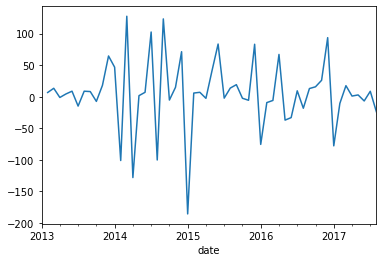

In [32]:
dfms['price firstdiff'].plot()

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

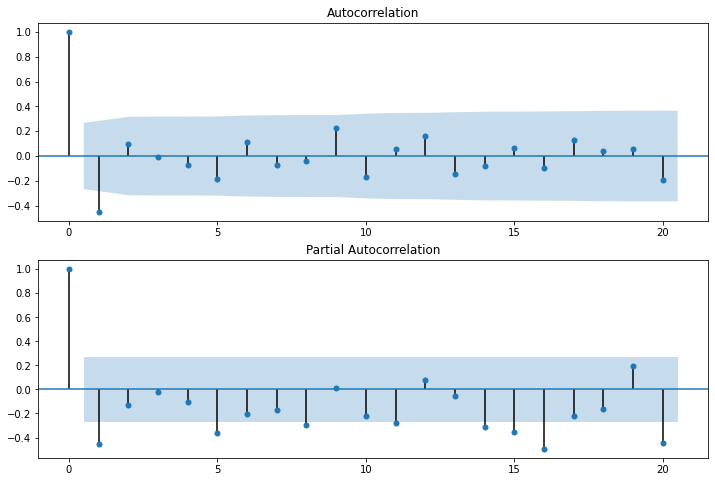

In [37]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dfms['price firstdiff'].iloc[2:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dfms['price firstdiff'].iloc[2:],lags=20,ax=ax2)

In [38]:
from statsmodels.tsa.arima_model import ARIMA

In [47]:
model=ARIMA(dfms['sales'],order=(2,1,2))
model_fit=model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [48]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.sales   No. Observations:                   55
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -288.160
Method:                       css-mle   S.D. of innovations             44.320
Date:                Mon, 13 Feb 2023   AIC                            588.320
Time:                        02:45:30   BIC                            600.364
Sample:                    02-28-2013   HQIC                           592.978
                         - 08-31-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.8055      0.588      9.881      0.000       4.654       6.957
ar.L1.D.sales     0.0760      0.545      0.139      0.889      -0.993       1.145
ar.L2.D.sales     0.2154      0.195      1.105      0.269      -0.166       0.597
ma.L1.D.sales    -0.8133      0.548     -1.486      0.137      -1.886       0.260
ma.L2.D.sales    -0.1867      0.545     -0.343      0.732      -1.255       0.881
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9855           +0.0000j            1.9855            0.0000
AR.2           -2.3386           +0.0000j            2.3386            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -5.3573           +0.0000j            5.3573            0.5000
-----------------------------------------------------------------------------
"""

In [43]:
print(len(dfms))

56


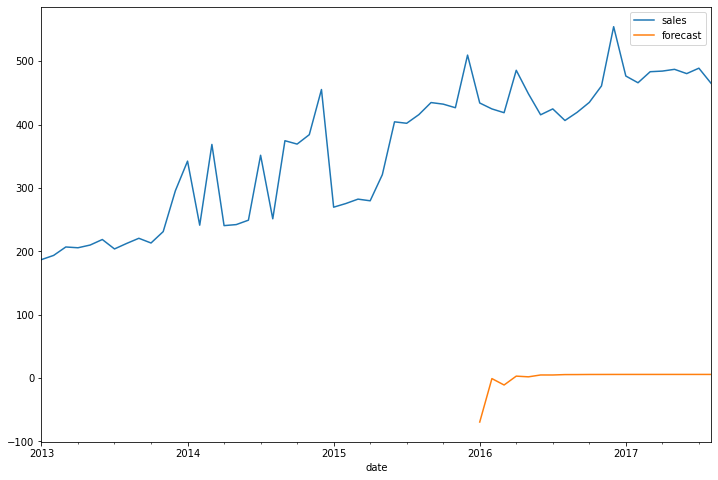

In [49]:
dfms['forecast']=model_fit.predict(start=len(dfms)-20,end=len(dfms)-1,dynamic=True)
dfms[['sales','forecast']].plot(figsize=(12,8))

In [50]:
import statsmodels.api as sm

In [51]:
model=sm.tsa.statespace.SARIMAX(dfms['sales'],order=(2, 2, 2),seasonal_order=(2,2,2,12))
results=model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


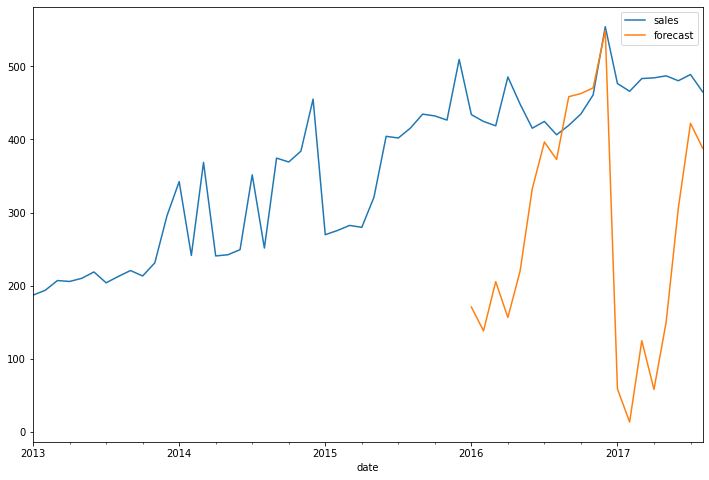

In [57]:
dfms['forecast']=results.predict(start=len(dfms)-20,end=len(dfms)-1,dynamic=True)
dfms[['sales','forecast']].plot(figsize=(12,8))

In [61]:
from pandas.tseries.offsets import DateOffset
future_date=[dfms.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [62]:
future_datest_df=pd.DataFrame(index=future_date[1:],columns=df.columns)

In [63]:
future_datest_df.tail()

,sales
2019-03-31,NaN
2019-04-30,NaN
2019-05-31,NaN
2019-06-30,NaN
2019-07-31,NaN


In [64]:
future_df=pd.concat([dfms,future_datest_df])

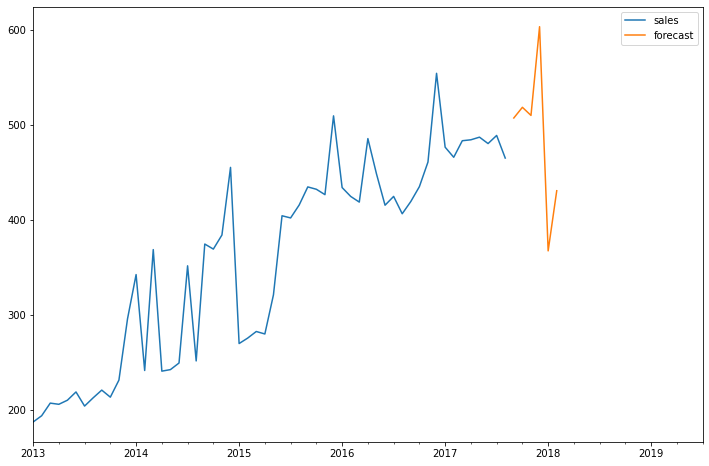

In [66]:
future_df['forecast'] = results.predict(start = len(dfms), end = len(dfms)+5, dynamic= True)  
future_df[['sales', 'forecast']].plot(figsize=(12, 8)) 